# question2 dirty iris

In [3]:
import pandas as pd
import numpy as np
df= pd.read_csv(r"dirty_iris.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [4]:
ogrows=df.shape[0]
ogrows

150

In [10]:
#a 
data=df.dropna(thresh=5)
newrows=data.shape[0]
newrows

96

In [11]:
percentage= (newrows/ogrows)*100
percentage

64.0

In [36]:
df['Sepal.Length'].unique()

array([ 6.4,  6.3,  6.2,  5. ,  5.7,  5.3,  5.9,  5.8,  4.8,  6. ,  6.8,
        nan,  5.5,  4.7,  5.6,  4.9,  5.4,  6.7,  4.6, 73. ,  6.5,  4.4,
        6.6,  0. ,  7.7,  7. ,  5.2,  5.1,  7.4,  4.3,  7.2,  6.1,  6.9,
        7.6,  7.9,  4.5, 49. ])

In [37]:
df['Sepal.Width'].unique()

array([ 3.2,  3.3,  nan,  3.4,  2.6,  2.7,  3. ,  3.1,  3.5,  2.8,  3.9,
       -3. ,  4. ,  3.6, 29. ,  2.9,  2.2,  2.5,  4.2,  3.8,  2.3,  3.7,
        4.1, 30. ,  0. ])

In [38]:
df['Petal.Length'].unique()

array([ 4.5  ,  6.   ,  5.4  ,  1.6  ,  3.5  ,    nan,  5.3  ,  5.1  ,
        4.1  ,  4.8  ,  1.7  ,  4.   ,  1.3  ,  4.2  ,  5.7  ,  5.9  ,
        1.4  ,  1.5  , 63.   ,  0.82 , 23.   ,  5.5  ,  5.8  ,  1.2  ,
        3.9  ,  6.7  ,  4.7  ,  4.4  ,  5.6  ,  3.3  ,  6.1  ,  1.1  ,
        4.9  ,  4.6  ,  6.6  ,  0.   ,  6.4  ,  5.2  ,  1.9  ,  4.3  ,
        5.   ,  0.925,  6.9  , 14.   ,  3.6  ,  3.8  ])

In [39]:
df['Petal.Width'].unique()

array([1.5, 2.5, 2.3, 0.4, 1. , 0.2, nan, 1.8, 0.6, 1.6, 1.4, 1.3, 0.1,
       2.1, 2. , 1.2, 1.9, 2.2, 0.3, 1.1, inf, 1.7, 2.4, 0.5])

In [12]:
#b
data.replace({'Sepal.Length':[np.inf,"#","?"],"Sepal.Width":[np.inf,"#","?"],"Petal.Length":[np.inf,"#","?"],"Petal.Width":[np.inf,"#","?"],"Species":[np.inf,"#","?"]},np.nan,inplace=True)

C:\Users\CSLab\AppData\Local\Temp\ipykernel_8220\1704589696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'Sepal.Length':[np.inf,"#","?"],"Sepal.Width":[np.inf,"#","?"],"Petal.Length":[np.inf,"#","?"],"Petal.Width":[np.inf,"#","?"],"Species":[np.inf,"#","?"]},np.nan,inplace=True)


In [ ]:
#c

In [13]:
rule1=data["Species"].apply(lambda x:True if x=="setosa" or x=="versicolor" or x=="virginica" else False)

In [14]:
rule2= data.apply(lambda x: True if x["Sepal.Length"]>=0 and x["Sepal.Width"]>=0 and x["Petal.Length"]>=0 and x["Petal.Width"]>=0 else False,axis=1)

In [15]:
rule3=data.apply(lambda x: True if x["Petal.Length"]>=2*x["Petal.Width"] else False , axis=1)

In [16]:
rule4= data["Sepal.Length"].apply(lambda x: True if x<=30 else False)

In [17]:
rule5= data.apply(lambda x: True if x["Sepal.Length"]> x["Petal.Length"] else False, axis=1)

In [18]:
Rules= pd.DataFrame({"Rule1":rule1,"Rule2":rule2,"Rule3":rule3,"Rule4":rule4,"Rule5":rule5})

In [19]:
Rules

,Rule1,Rule2,Rule3,Rule4,Rule5
0,True,True,True,True,True
1,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
7,True,True,True,True,True
...,...,...,...,...,...
143,True,True,True,True,True
144,True,True,True,True,True
145,True,True,True,True,True
146,True,True,True,True,True


In [20]:
#d
data2=Rules.apply(lambda x: len(x)-x.sum())
print("Violations->")
print(data2)

Violations->
Rule1    0
Rule2    2
Rule3    2
Rule4    1
Rule5    1
dtype: int64


Text(0.5, 1.0, 'RULES VS NO. OF VIOLATIONS')

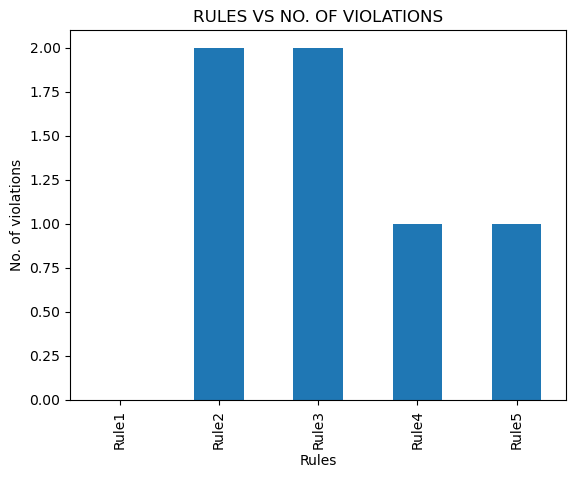

In [22]:
import matplotlib.pyplot as plt
plt.figure()
data2.plot(kind="bar")
plt.xlabel("Rules")
plt.ylabel("No. of violations")
plt.title("RULES VS NO. OF VIOLATIONS")

C:\Users\CSLab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepal.Length'>

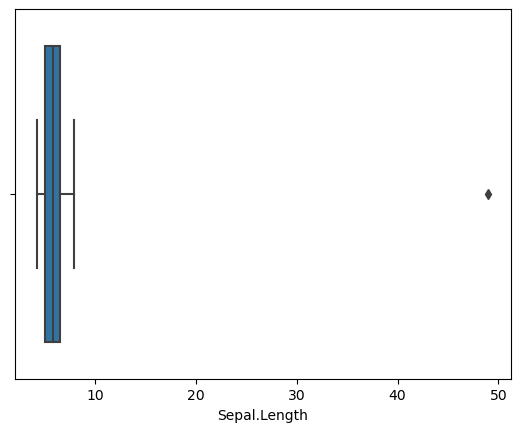

In [23]:
#e
x=data["Sepal.Length"]
import seaborn as sns
sns.boxplot(x)

In [24]:
x.describe()

count    96.000000
mean      6.319792
std       4.482918
min       4.300000
25%       5.100000
50%       5.800000
75%       6.500000
max      49.000000
Name: Sepal.Length, dtype: float64